In [1]:
import torch
import torch.nn.functional as F
from PIL import Image, ImageDraw
from torchvision import transforms

In [2]:
test_image = Image.open("example_pair1.jpg")
test_image_same = Image.open("example_pair2.jpg")
test_image_diff = Image.open("example.jpg")

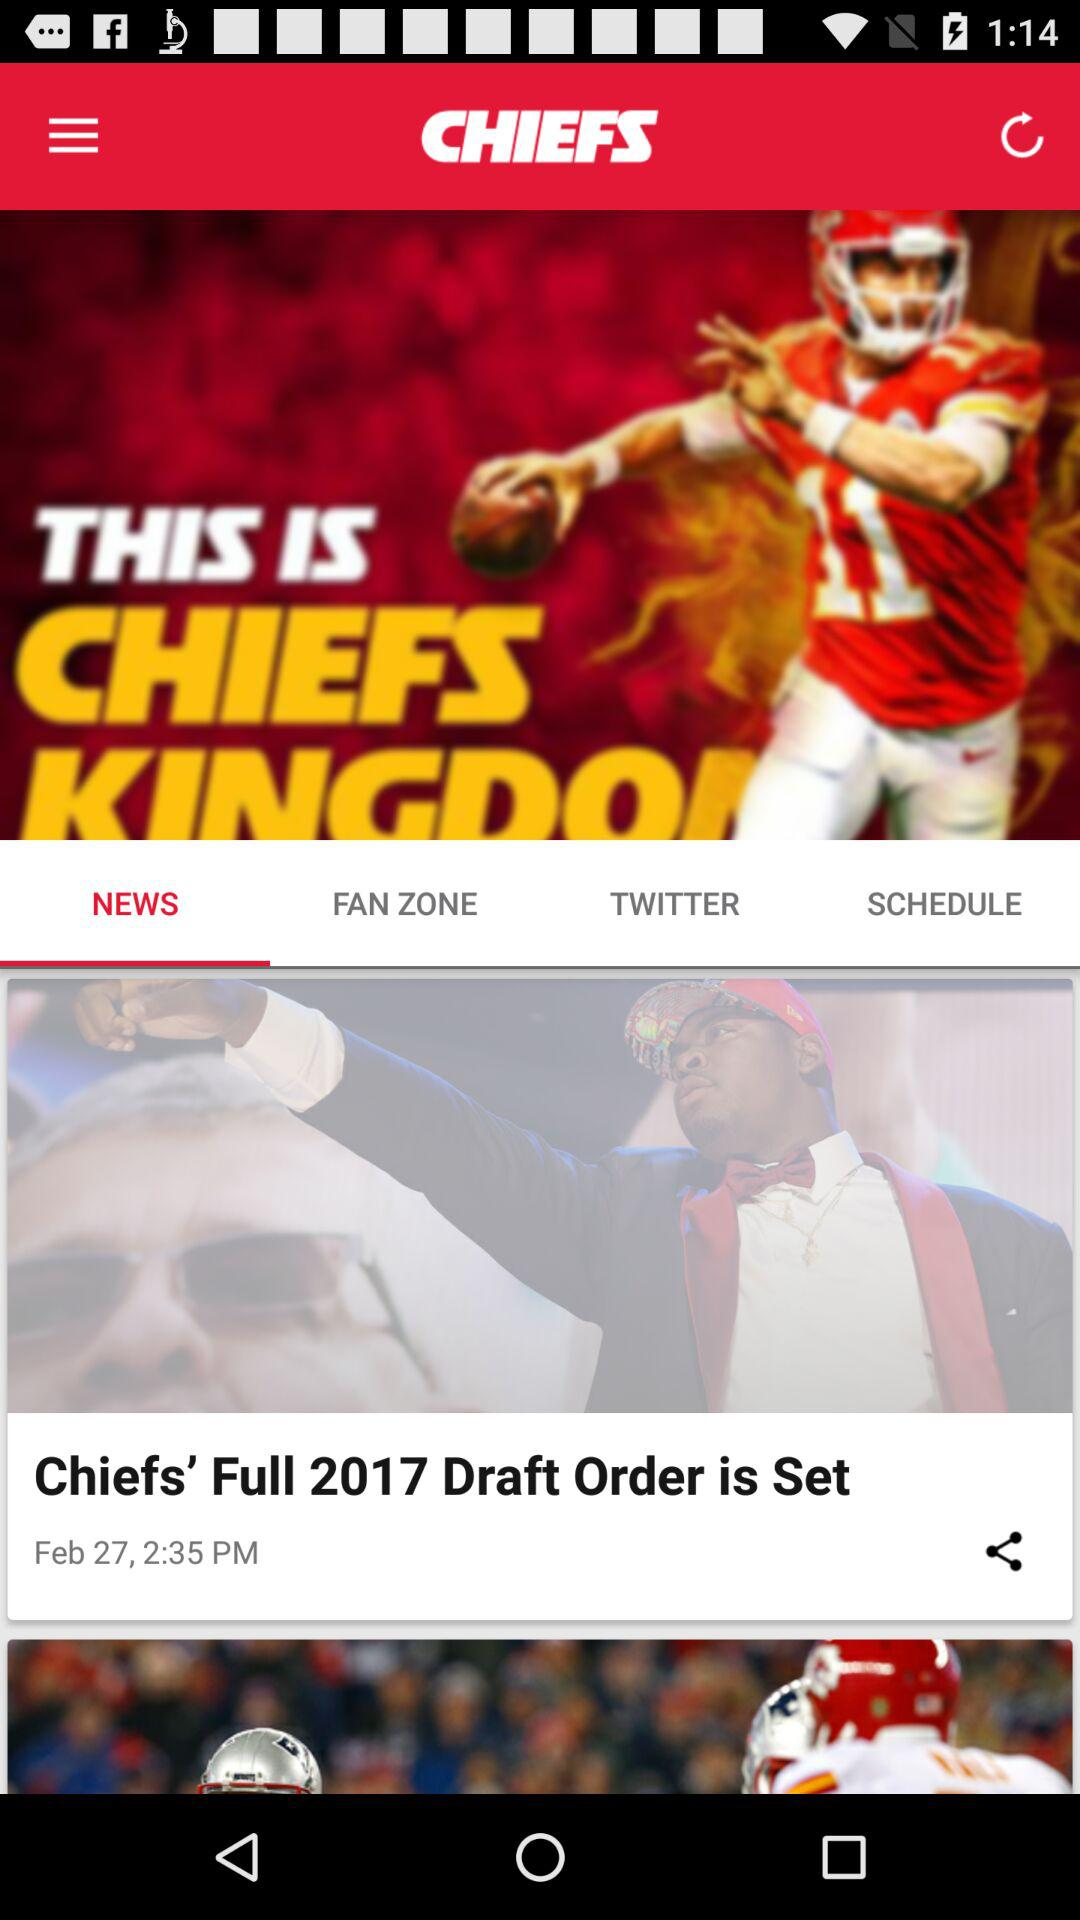

In [3]:
test_image

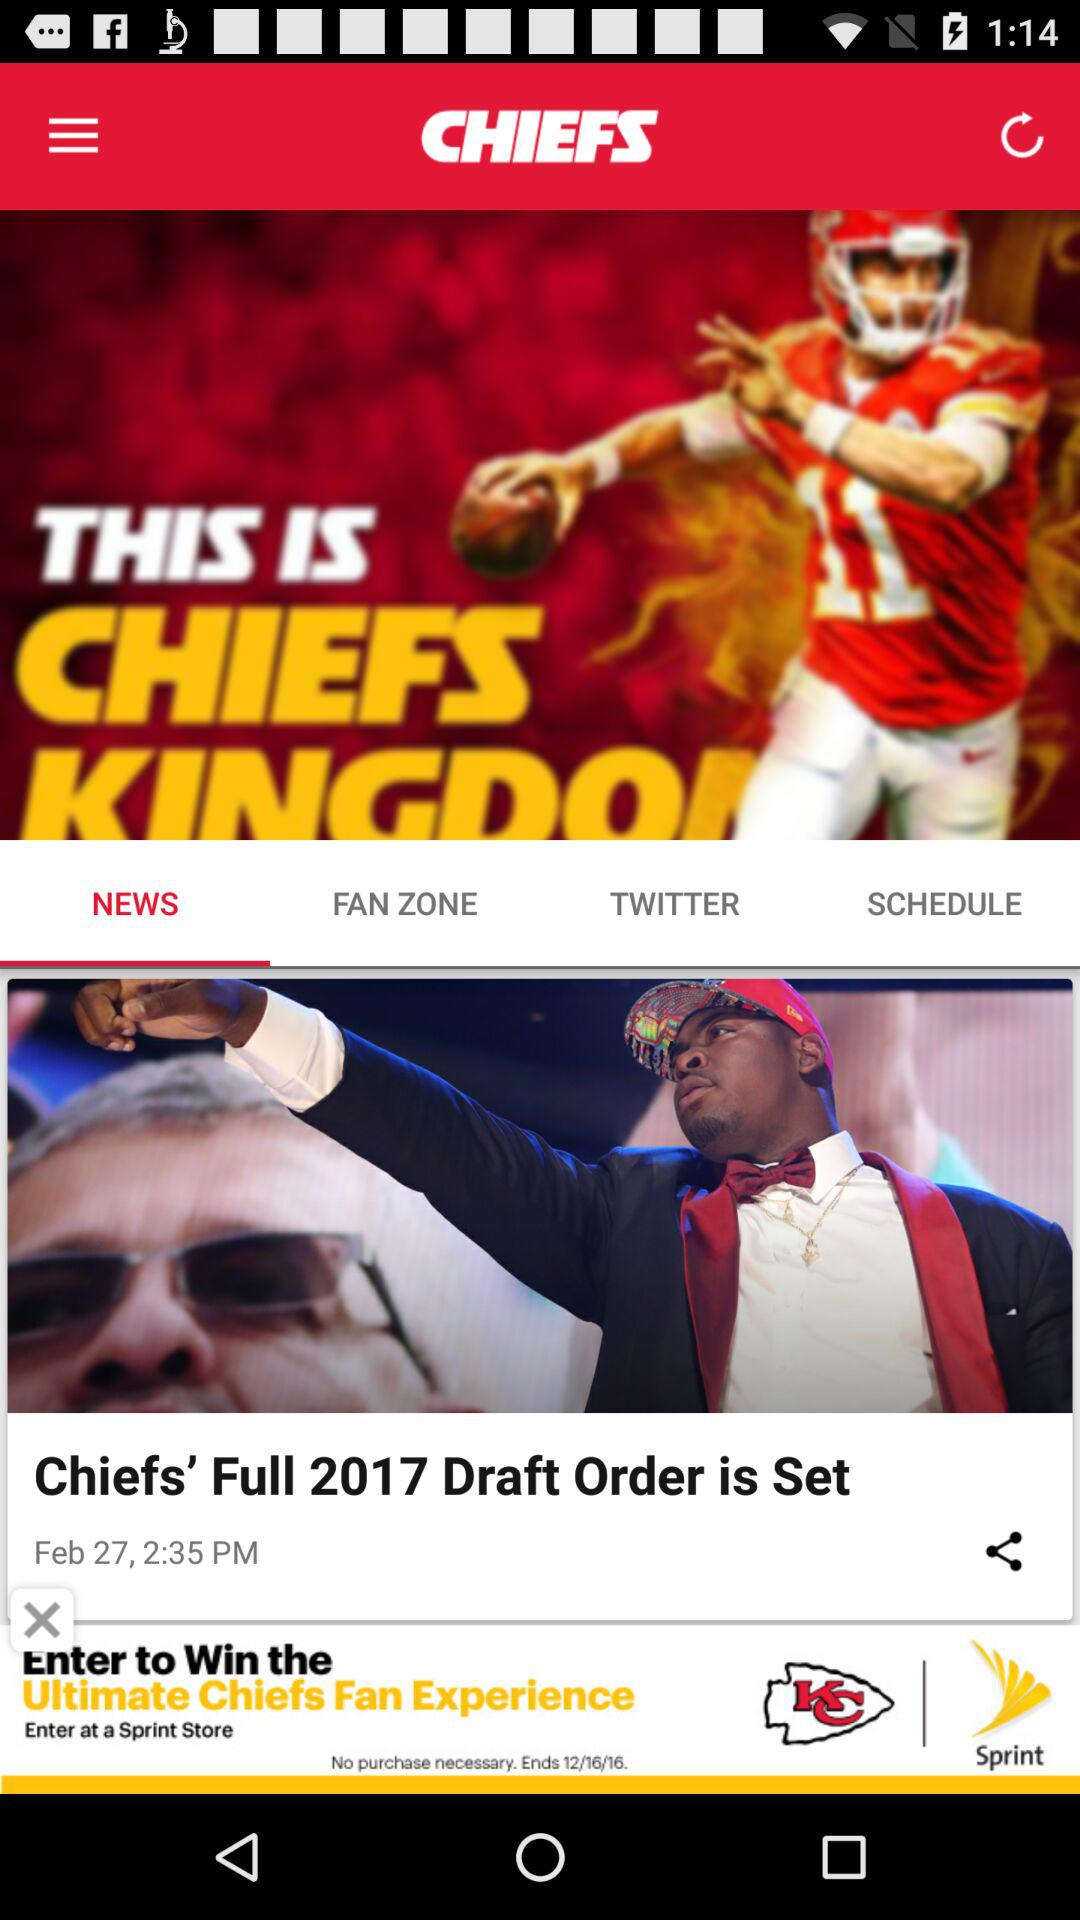

In [4]:
test_image_same

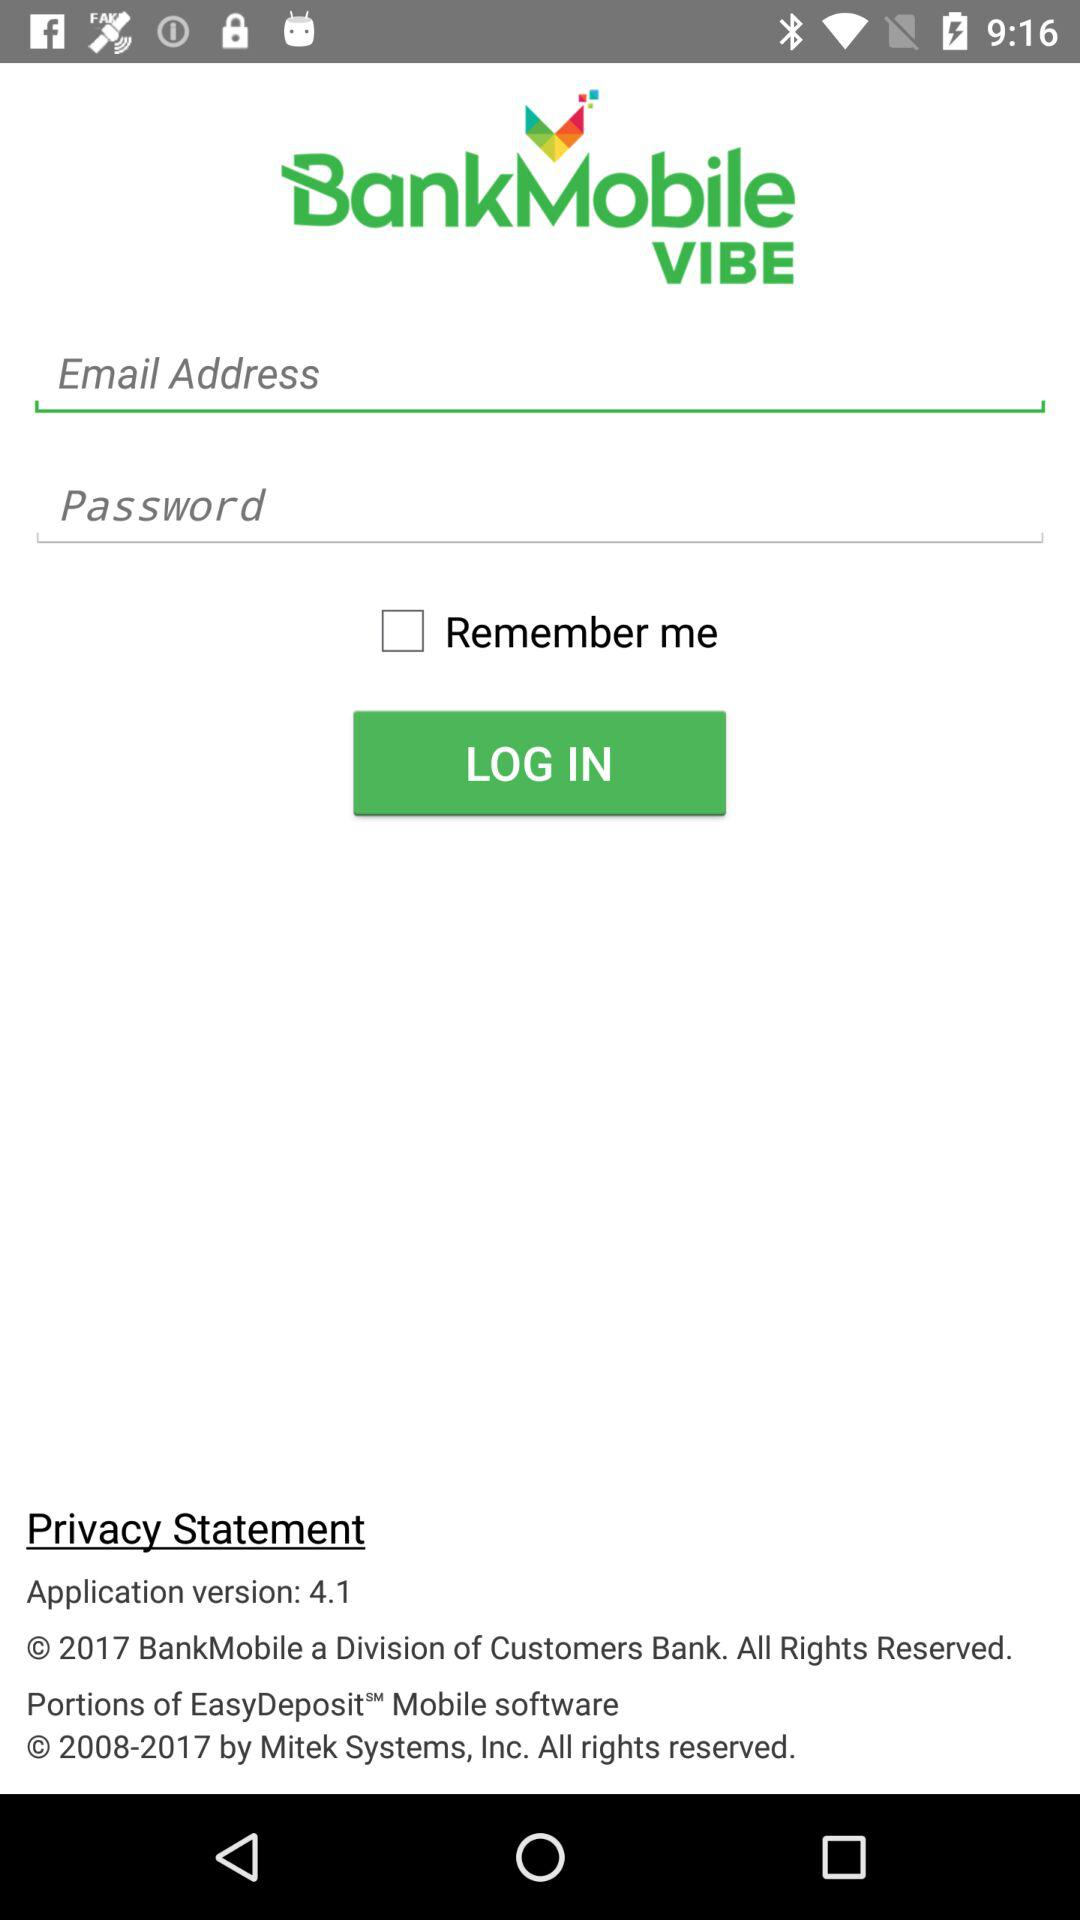

In [5]:
test_image_diff

In [6]:
m = torch.jit.load("../downloads/checkpoints/screensim-resnet-uda+web350k.torchscript")

In [7]:
img_transforms = transforms.Compose([
    transforms.Resize((256, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [8]:
img_input = img_transforms(test_image)
img_input_same = img_transforms(test_image_same)
img_input_diff = img_transforms(test_image_diff)

In [9]:
embedding = m(img_input.unsqueeze(0))
embedding_same = m(img_input_same.unsqueeze(0))
embedding_diff = m(img_input_diff.unsqueeze(0))

In [10]:
dist_same = torch.linalg.norm(embedding - embedding_same)

In [11]:
dist_diff = torch.linalg.norm(embedding - embedding_diff)

In [12]:
margin = (0.2 + 0.5) / 2 # this is an average of the margin_pos and margin_neg hyperparameters

In [13]:
print("same pair dist: {:.3f} same screen? ".format(float(dist_same)) + str((float(dist_same) < margin)))
print("diff pair dist: {:.3f} same screen? ".format(float(dist_diff)) + str((float(dist_diff) < margin)))

same pair dist: 0.315 same screen? True
diff pair dist: 0.507 same screen? False
